# Import Modules

In [1]:
from pyFish import Characterize
from pyFish.tests import load_sample_data

# Load Sample data
> Comment second line for pairwise data

> Uncomment 3rd line for vegetation data

In [5]:
data = load_sample_data('data/model_data/scalar/ternary.csv')
X = data[:,0]
t = data[:,1]

# To run the analysis
### Initialize object with parameters
<code>pyFish.Characterize(
    data,
    t,
    t_int=None,
    dt='auto',
    delta_t=1,
    t_lag=1000,
    inc=0.01,
    inc_x=0.1,
    inc_y=0.1,
    max_order=10,
    fft=True,
    drift_order=None,
    diff_order=None,
    order_metric='R2_adj',
    simple_method=True,
    n_trials=1,
    **kwargs,
)
</code>
<details>
    <summary>
     Show more help
    </summary>

Input params:
--------------
<div class="alert alert-block alert-info">
    **data** : list

    time series data to be analysed, data = [x] for scalar data and data = [x1, x2] for vector
    where x, x1 and x2 are of numpy.array object type
    
**t** : numpy.array

    time stamp of time series

**t_int** : float

    time increment between consecutive observations of the time series
    
**dt** = 'auto' : 'auto' or int

    time scale to run the analysis on (for determinsitic part);
    algorithm estimates dt if 'auto' is passed, else takes the user input
    
**delta_t** = 1 : int

    time scale to run the analysis on (for stochastic part)
    
**inc** = 0.01 : float

    increment in order parameter for scalar data
    
**inc_x** = 0.1 : float

    increment in order parameter for vector data x1
    
**inc_y** = 0.1 : float

    increment in order parameter for vector data x2
    
**drift_order** = None : int

    order of polynomial to be fit for calculated drift (deterministic part);
    if None, algorithim estimates the optimium drift_order
    
**diff_order** = None : int

    order of polynomial to be fit for calculated diff (stochastic part);
    if None, algorithim estimates the optimium diff_order
    
**max_order** = 10 : int

    maxmium drift_order and diff_order to consider
    
**fft** = True : bool

    if true use fft method to calculate autocorrelation else, use standard method
    
**t_lag** = 1000 : int

    maxmium lag to use to calculate acf

****kwargs** 
    all the parameters for pyFish.preporcessing and pyFish.noise_analysis

</div>
    
returns:
-----------
<div class="alert alert-block alert-success">

**output** : pyFish.output

    object to access the analysed data, parameters, plots and save them.
</div>
</details>

| Data Type : False        | Autocorellation time : 85    | Gaussian Noise : True    |
| M range : (-1.0, 1.0)    | M mean : 0.05               | |M| mean : 0.74          |



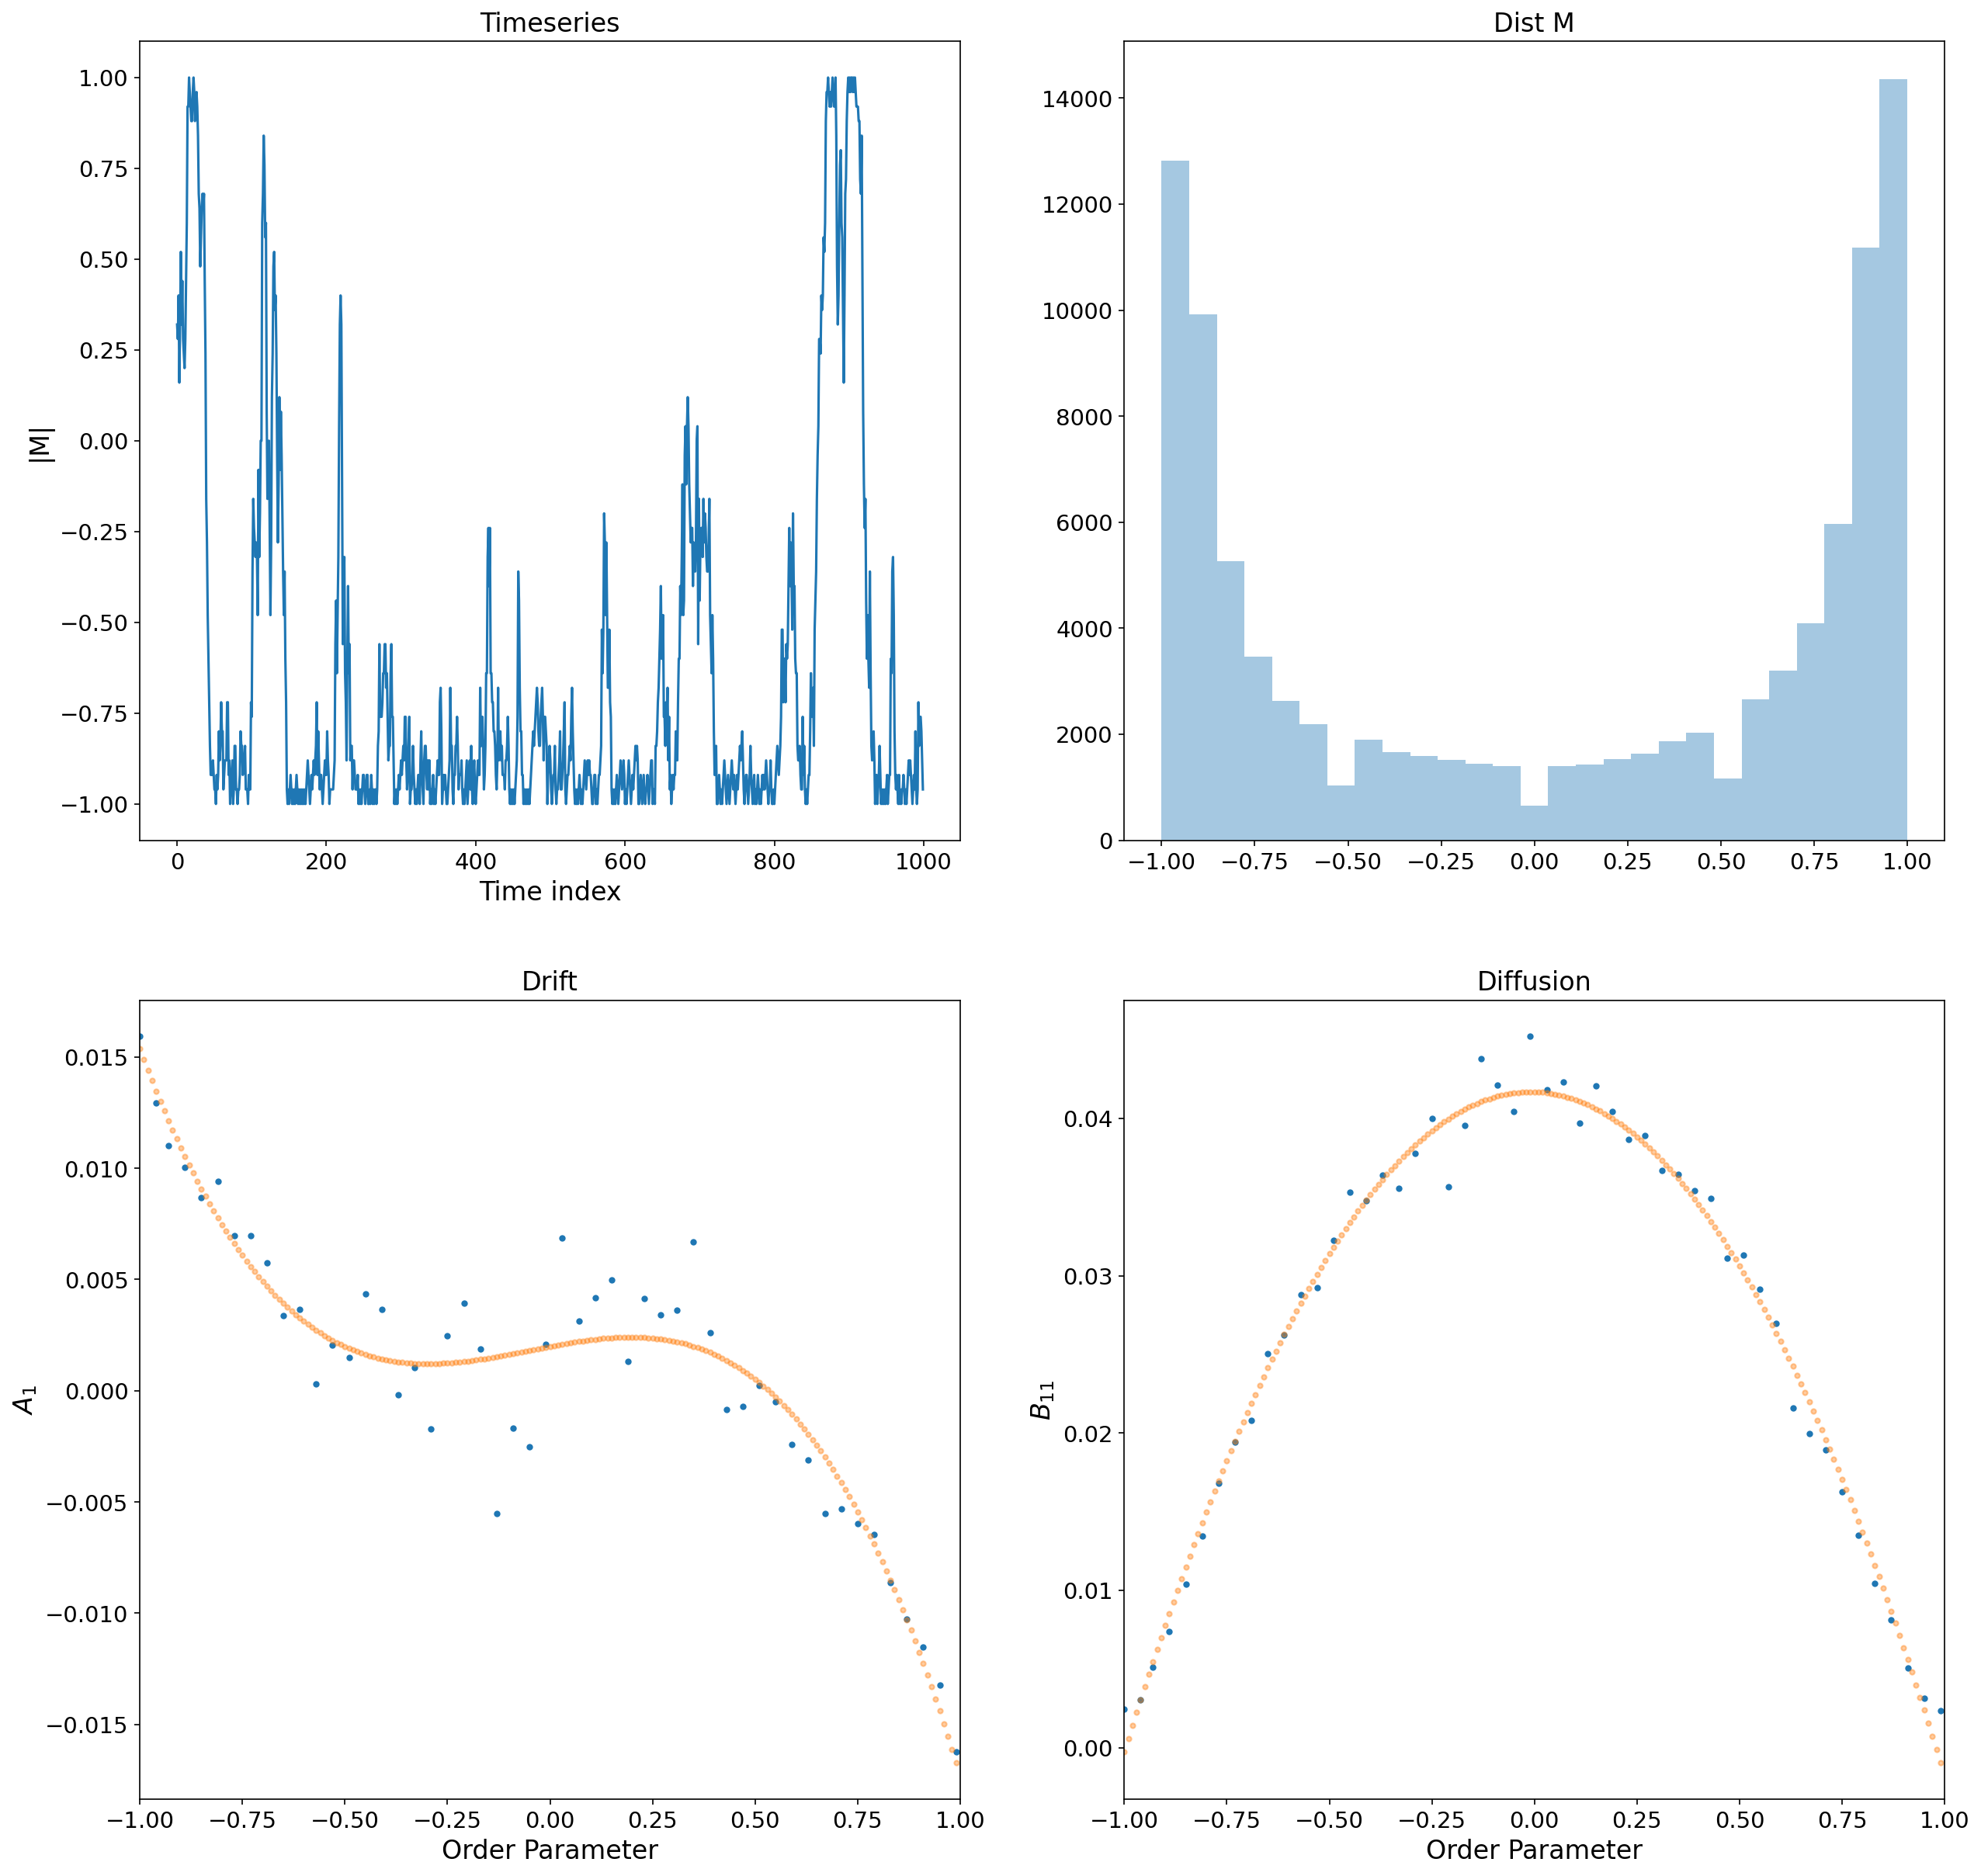

In [6]:
ch = Characterize(data=[X],t=t)
ch

# Get analysed data
<code>pyFish.output.data()</code>
<details>
    <summary>
     Show more help
    </summary>
<div class="alert alert-block alert-info">

Input params:
--------------
**None**
</div>
    
<div class="alert alert-block alert-success">
    
returns:
--------------
**data** : list

        if vector [drift, diff, avgdrift, avgdiff, op]
        else, [avgdriftX, avgdriftY, avgdiffX, avgdiffY, avgdiffXY, op_x, op_y] 
</div>
</details>

In [24]:
drift, diff, avgdrift, avgdiff, op = ch.data()
len(diff), len(drift),len(avgdrift), len(avgdiff), len(op)

(100000, 99997, 200, 200, 200)

# To view parameters
<code>pyFish.output.parameters(
    save=False, 
    savepath=None, 
    file_name='parameters.txt'
    )
</code>
<details>
    <summary>
     Show more help
    </summary>
<div class="alert alert-block alert-info">
    
Input params:
--------------

**save** : bool

        if True, save parameters to file

**savepath** : str

        save destination path, if None, data is saved in current/working/directory/results
        
**file_name** = 'parameters.txt' : str

        name of the file
</div>
<div class="alert alert-block alert-success">
    
returns:
------------
**params** : dict, json
    
        all parameters used and calculated during analysis
</div>
</details>

In [7]:
parameters = ch.parameters()
parameters

{'dt_': 'auto',
 'res_dir': '2021-02-02 05-26-24',
 't_lag': '1000',
 'max_order': '10',
 'inc': '0.01',
 'inc_x': '0.1',
 'inc_y': '0.1',
 'delta_t': '1',
 'order_metric': 'R2_adj',
 'fft': 'True',
 'drift_order': '3',
 'diff_order': '2',
 'n_trials': '1',
 'n_dt': '8',
 'vector': 'False',
 't_int': '0.999990000099999',
 'autocorrelation_time': '85.63247382006958',
 'dt': '9',
 'gaussian_noise': 'True',
 'k': '-2.2816675707659857',
 'l_lim': '-84.57505927645008',
 'h_lim': '88.52486015550747'}

# To show data plots
<code>pyFish.output.visualize(
    show=True, 
    save=False, 
    savepath=None
    )
</code>
<details>
    <summary>
     Show more help
    </summary>
<div class="alert alert-block alert-info">
    
Input params:
--------------
**show** = True : bool

        if True, show the figures 
**save** = False : bool

        if True save the figures to disk
**savepath** = None : str

        save destination path, if None, data is saved in current/working/directory/results/visualize
</div>
<div class="alert alert-block alert-success">
    
returns:
-------------
        None
</div>
</details>

In [ ]:
ch.visualize()

# To show graphs used to estimate the time scale dt
<code>pyFish.output.diagnostics(
    show=True, 
    save=False, 
    savepath=None
    )
</code>
<details>
    <summary>
     Show more help
    </summary>
<div class="alert alert-block alert-info">

Input params:
--------------
**show** = True : bool
    
        if True, show the figures 
**save** = False : bool
    
        if True save the figures to disk
**savepath** = None : str
    
        save destination path, if None, data is saved in current/working/directory/results/diagnostics
</div>
<div class="alert alert-block alert-success">

returns:
-------------
    None
</div>
</details>

In [ ]:
 ch.diagnostic()

# Noise Characterstics plots
<code>pyFish.output.noise_characterstics(
    show=True, 
    save=False, 
    savepath=None
    )
</code>
<details>
    <summary>
     Show more help
    </summary>
<div class="alert alert-block alert-info">
    
Input params:
--------------
**show** = True : bool

        if True, show the figures 
**save** = False : bool

        if True save the figures to disk
**savepath** = None : str

        save destination path, if None, data is saved in 
        current/working/directory/results/noise_characterstics
</div>
<div class="alert alert-block alert-success">
    
returns:
--------------
        None
</div>
</details>

In [ ]:
ch.noise_characterstics()

# To save data to disk
<code>pyFish.output.save_data(
    file_name=None, 
    savepath=None, 
    savemat=True
    )
</code>
<details>
    <summary>
     Show more help
    </summary>
<div class="alert alert-block alert-info">

Input params:
--------------
**file_name** : str

        name of the file, if None, file name will be the time a which the data was analysed
**savepath** : str

        destination path to save data, if None, files will me saved in current/working/directory/results
**savemat** : bool

        if True also saves the data in matlab compatable (.mat) format.
</div>
<div class="alert alert-block alert-success">

returns:
-------------
        None
</div>
</details>

In [ ]:
ch.save_data()

# To save the data along with plots
<code>pyFish.output.save_all_data(
    savepath=None, 
    show=False, 
    file_name=None
    )
</code>
<details>
    <summary>
     Show more help
    </summary>
<div class="alert alert-block alert-info">

Input params:
--------------
**show** : bool

        if True, shows the figure
**file_name** : str

        name of the files, if None, time at which data was analysed is consideres as file name
**savepath** : str

        save destination path, if None, data is saved in current/working/directory/results
</div>
<div class="alert alert-block alert-success">

returns:
-------------
        None
</div>
</details>

In [ ]:
ch.save_all_data()

# To release the memory used
> Useful while multiple datafiles in loop

<code>pyFish.output.release()</code>
<details>
    <summary>
     Show more help
    </summary>
<div class="alert alert-block alert-info">

Input params:
--------------
    None
</div>
<div class="alert alert-block alert-success">

returns:
--------------
    None
</div>
</details>

In [ ]:
ch.release()